In [38]:
import pandas as pd
import numpy as np
import array
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns

In [14]:
df = pd.read_csv(r"studentData.csv")

In [15]:
df

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [16]:
# Checking for null Valus
df.isnull()

,Exam1,Exam2,Admitted
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Exam1', 'Exam2']], df['Admitted'], test_size=0.2, random_state=42)

In [18]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Predict Admission Status
y_pred = model.predict(X_test)

In [20]:
# Evaluating Performance of Model
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the logistic regression model is {accuracy:.2f}.')

The accuracy of the logistic regression model is 0.80.


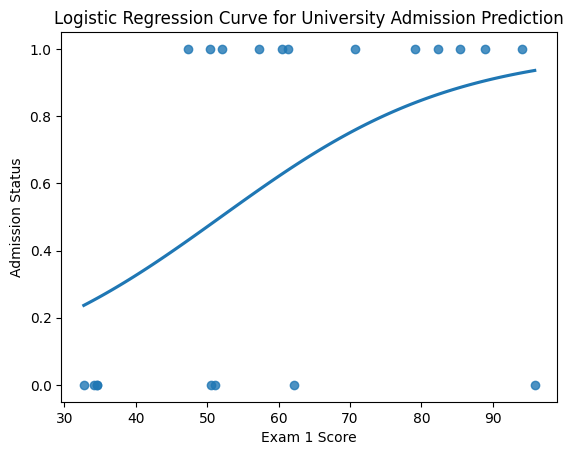

In [21]:
# Plotting the Regression Curve For Exam 1
sns.regplot(x=X_test['Exam1'], y=y_test, data=df, logistic=True, ci=None)
plt.title('Logistic Regression Curve for University Admission Prediction')
plt.xlabel('Exam 1 Score')
plt.ylabel('Admission Status')
plt.show()

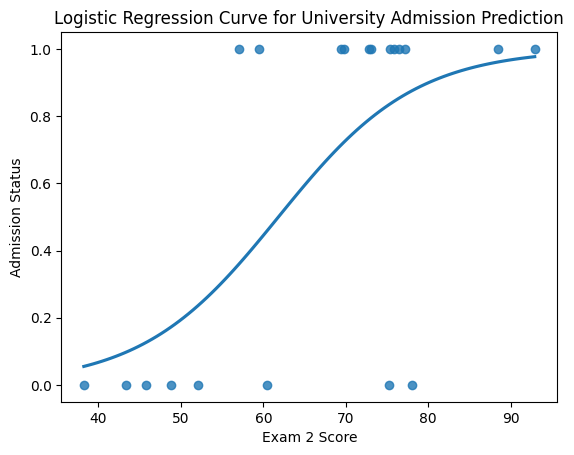

In [22]:
# Plotting the Regression Curve For Exam 2
sns.regplot(x=X_test['Exam2'], y=y_test, data=df, logistic=True, ci=None)
plt.title('Logistic Regression Curve for University Admission Prediction')
plt.xlabel('Exam 2 Score')
plt.ylabel('Admission Status')
plt.show()

In [23]:
# Test the Model

# Input the scores of the student
exam1_score = float(input('Enter the score of exam 1: '))
exam2_score = float(input('Enter the score of exam 2: '))

# Predict the admission status of the student
if model.predict([[exam1_score, exam2_score]]) == 1:
    print('The student is likely to get admitted to the university.')
else:
    print('The student is unlikely to get admitted to the university.')

print(f'Program Accuracy:\t {accuracy}')

The student is likely to get admitted to the university.
Program Accuracy:	 0.8


C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

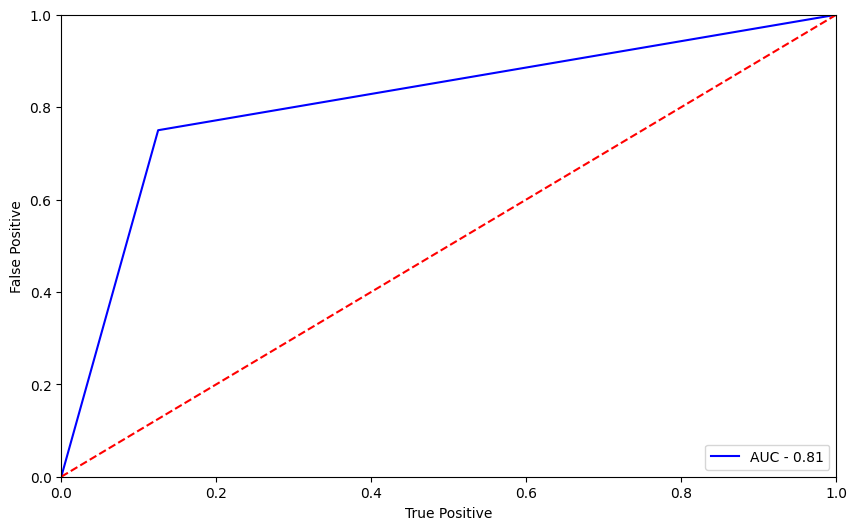

In [47]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'b',label='AUC - %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive')
plt.ylabel('False Positive')
plt.show()

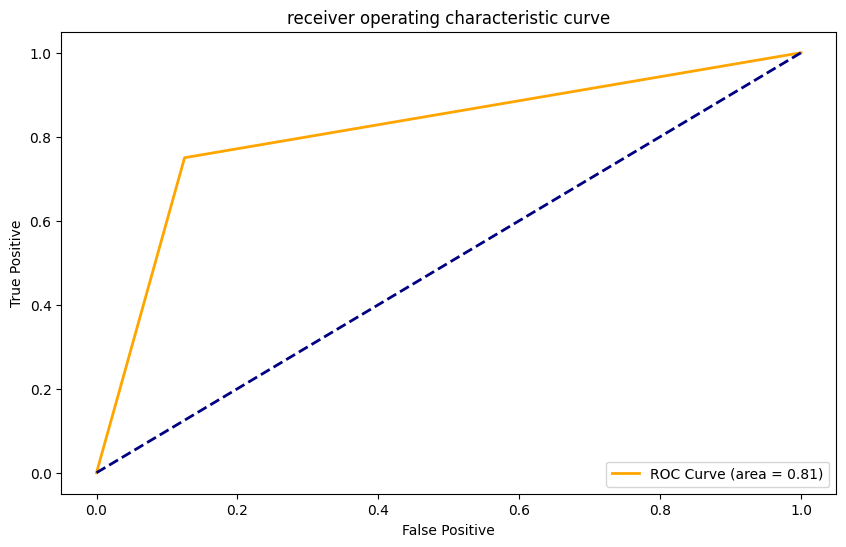

In [49]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='orange',lw=2,label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('receiver operating characteristic curve')
plt.legend(loc='lower right')
plt.show()